## Clustering: Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
dataset=pd.read_csv('./../0. DataSets/Mall_Customers.csv')
X=dataset.iloc[:,[3,4]].values

In [17]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
X[:5] #so para ver e comparar a diferenca entre datasets, porque no X apliquei .values, que acho que transformou um dataframe num array numpy talvez

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

### Using the dendrogram to find the optimal number of clusters

In [25]:
import scipy.cluster.hierarchy as sch

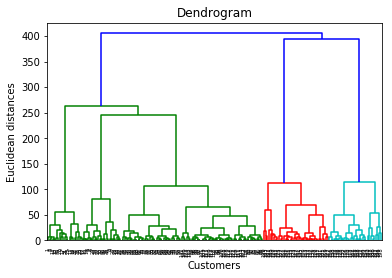

In [27]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#para escolher o optimal number of clusters:
#ver qual e a linha maior vertical que nao e cortada por linhas horizontaais
#neste caso e o troco azul que vai +- de y=110 ate y=240
#nessa linha depois tracar uma linha horizontal e ver quantas linhas verticais ela corta
#neste caso 5

In [30]:
#Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [31]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

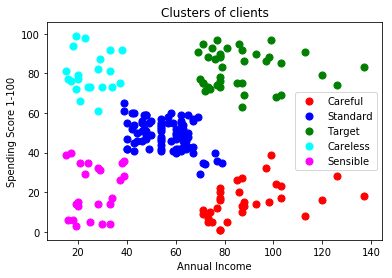

In [35]:
#Visualizing the clusters
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='cyan',label='Careless')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='Sensible')

#Visualisar os centroids dos clusters
# plt.scatter(hc.cluster_centers_[:,0],hc.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score 1-100')
plt.legend()
plt.show()